# Title

## Introduction

## Methods and Results

Hypothesis testing through (1) bootstrapping approach via randomization and (2) asymptotic approach via two-sample t-test was used to conduct this inferential study. The study hypothesised the difference in BMI means between the diabetic and non-diabetic people in the dataset at a 5% significance level. Additionally, to provide an idea of the size of the effect, a 95% confidence interval was constructed for both hypothesis testing approaches.

Let m1 be the mean BMI value for females with diabetes, and m2 be the mean BMI value for females without diabetes with the following hypothesis:


<center>
$$ \text{Null Hypothesis} : m_1 - m_2 = 0 $$

    
$$ \text{Alternative hypothesis}: m_1-m_2 > 0 $$ 

</center>

### Report’s Reliability :

(1) The data is taken from a trustworthy source (NIDDK), ensuring its authenticity and validity.

(2) The data pass the central limit theorem (CLT) assumptions, such that:

- Despite the sample distributions for both diabetic and non-diabetic groups, shown in Figure 1, being slightly right-tailed histograms, the sample size is 757, which should be sufficiently large for CLT to kick in.
- The dataset is drawn independently and is less than 10% of the population.
- The estimator is a sum of random components.

Hence, the CLT can be relied on when doing a two-sample t-test.


### Limitations and How it’s Addressed :

Since the study infers the population based on a single sample, the plots and estimates produced aren't sufficient to provide to a stakeholder. Therefore, this study provided a broader confidence interval (of 95% confidence level) to address this gap. This ensures a higher probability the true difference in the mean and its unpredictability level are captured. 

### Method Explained, Step by Step :

In [145]:
set.seed(999)
options(repr.plot.width = 15, repr.plot.height = 10, warn = -1) 

# load packages ------------------------------------------------------------------------
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(datateachr)
library(grid)
library(crayon)

# colorblind friendly color ------------------------------------------------------------
lightblue <- "#56B4E9"
lightorange <- "#E69F00"
lightgreen <- "#009E73"
lightyellow <- '#FFC20A'

# dataset read from the web ------------------------------------------------------------
diabete <- read_csv('https://raw.githubusercontent.com/Kayleeli/STAT201-Group-23/main/data/diabetes.csv', show_col_types = FALSE) 

In [59]:
# clean + wrangled the data into tidy format ------------------------------------------

    # because we only want to focus on the relationship between bmi + outcome, selecting only:
        # 1) bmi column : body mass index in kg/m^2
        # 2) outcome column : TRUE = diabetic , FALSE = Non-diabetic

    # and filtering values less than 0 because: 0 was a placeholder for people who did not get their BMI value recorded.

diabetes <- diabete %>%
    select(bmi, outcome) %>%
    filter(bmi > 0)

    # splitting people into 2 groups based on "outcome" (TRUE (diabetic) vs FALSE (non-diabetic))

diabetic_group <- diabetes %>%
    filter(outcome=="TRUE") %>%
    select(bmi)

nondiabetic_group <- diabetes %>%
    filter(outcome=="FALSE") %>%
    select(bmi)

In [132]:
# SAMPLE SIZE
    sample_size <- diabetes %>% 
        summarize(sample_size = n())

cat(bold('Table 1 \n')) +
cat(('Sample Size of the Dataset Being Used in This Project\n ')) 
sample_size 

Table 1 
Sample Size of the Dataset Being Used in This Project
 

integer(0)

sample_size
<int>
757


 <font size="3"> **(1) Exploratory Data Analysis :** </font>

In [77]:
# SAMPLE PARAMETERS
    
    # mean bmi values for people who are diabetic in this dataset
    diabetic_group_mean <- diabetic_group %>%
        summarize(mean = mean(bmi)) %>%
        pull()

    # mean bmi values for people who are non-diabetic in this dataset
    nondiabetic_group_mean <- nondiabetic_group %>%
        summarize(mean = mean(bmi)) %>%
        pull()

    # difference in mean bmi value for people with and without diabetes in this dataset
    difference_in_mean_sample <- diabetic_group_mean - nondiabetic_group_mean

    # summary of the population parameter calcuated above into a dataframe
    pop_parameter_summary <- matrix(c(diabetic_group_mean, nondiabetic_group_mean, difference_in_mean_sample), ncol = 3, byrow = TRUE) 
    colnames(pop_parameter_summary) <- c("Sample BMI Mean Value (Diabetic)", "Sample BMI Mean Value (Non-Diabetic)", "Difference in BMI Mean Value in Sample ((Diabetic)-(Non-Diabetic))")
    rownames(pop_parameter_summary) <- c('Values (in kg/m^2)')
    table_pop_parameter_summary <- as.data.frame(pop_parameter_summary)


# SAMPLE PARAMETER VALUES (SUMMARY)
cat(bold('Table 2 \n'))
cat(('Summary of Sample Parameter Values\n '))
table_pop_parameter_summary

Table 2 
Summary of Sample Parameter Values
 

,Sample BMI Mean Value (Diabetic),Sample BMI Mean Value (Non-Diabetic),Difference in BMI Mean Value in Sample ((Diabetic)-(Non-Diabetic))
,<dbl>,<dbl>,<dbl>
Values (in kg/m^2),35.40677,30.85967,4.547093


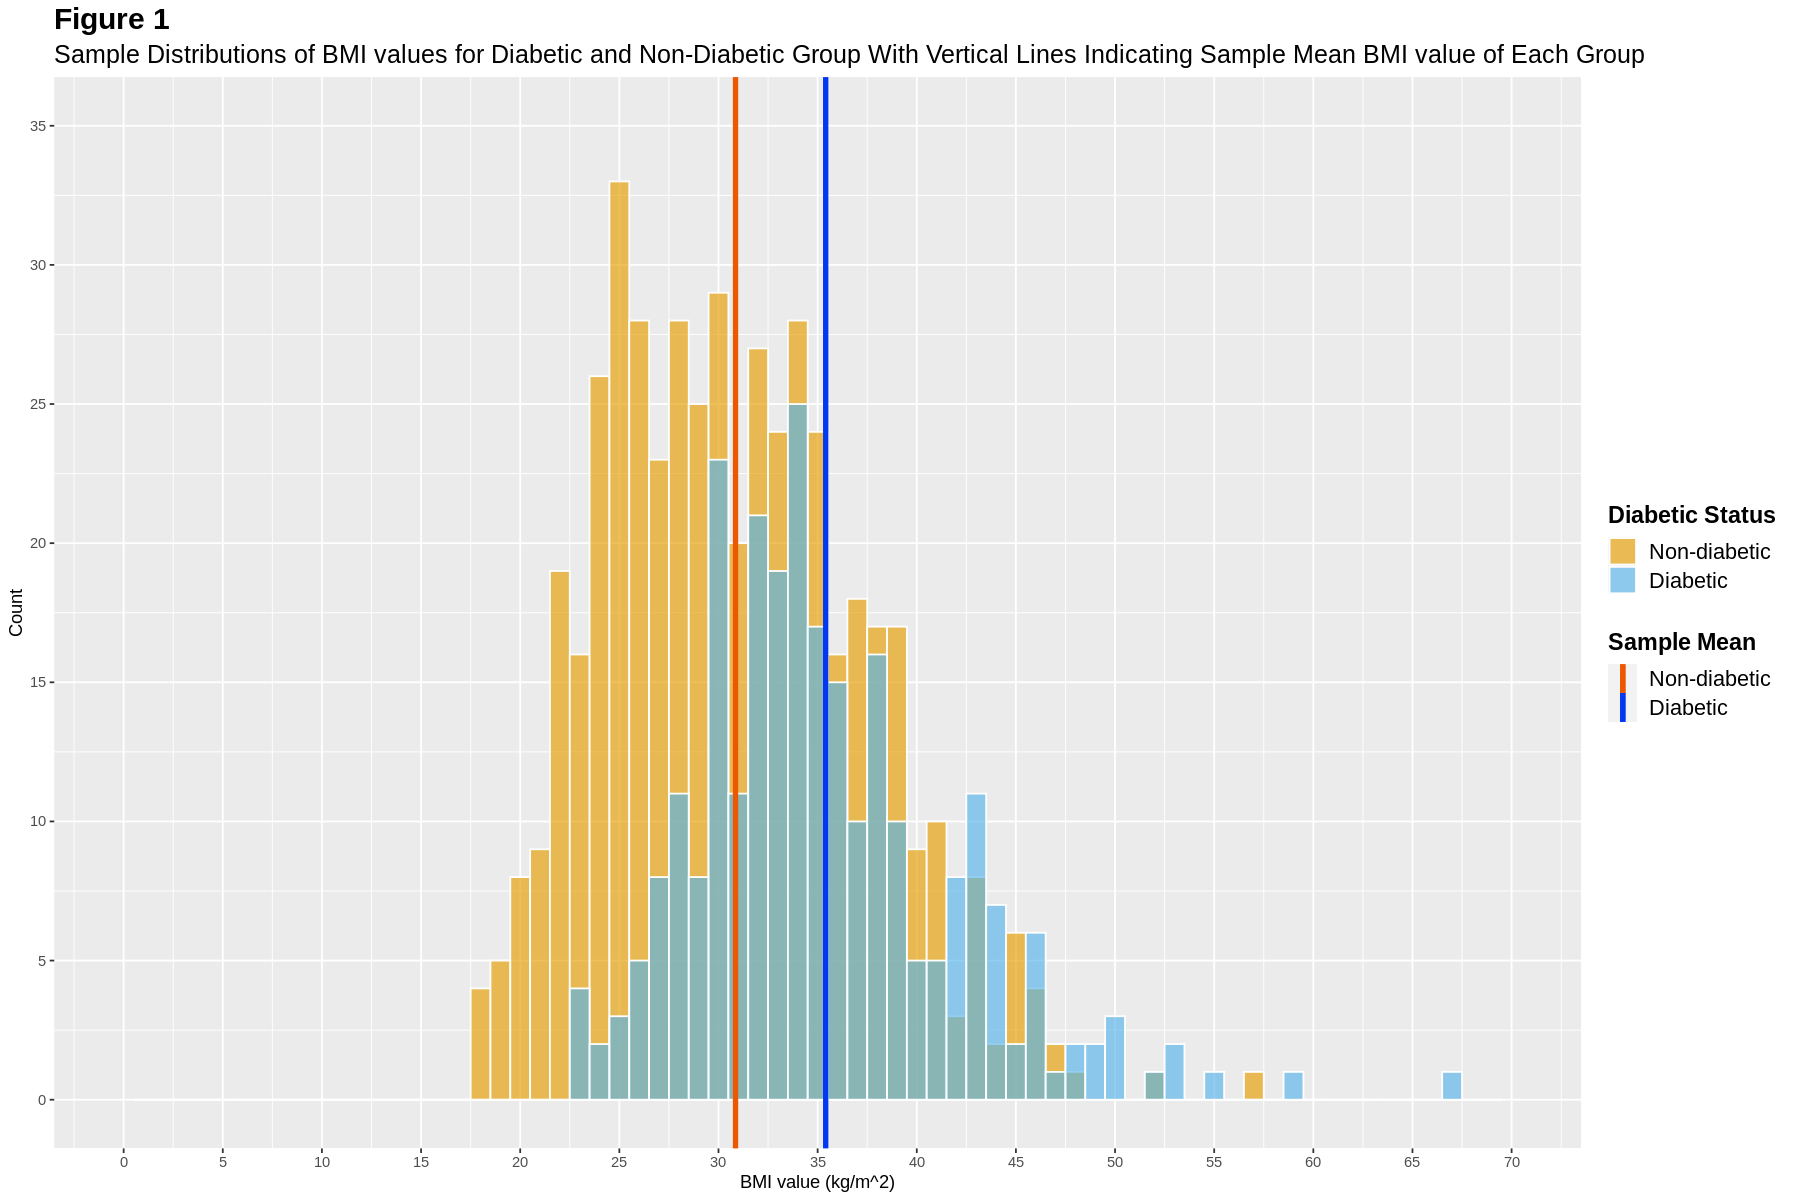

In [72]:
# HISTOGRAM : SAMPLE DISTRIBUTION 
# [Diabetic vs Non-Diabetic, with vertical line indicating the mean of each group]

    diabetic_and_nondiabetic_sample_hist <-
        diabetes %>%
        ggplot(aes(x = bmi, fill = outcome)) +
        geom_histogram(position = "identity", alpha = 0.65, binwidth = 1, color = 'white') +
        labs(x="BMI value (kg/m^2)", y = 'Count', title = 'Figure 1', subtitle = 'Sample Distributions of BMI values for Diabetic and Non-Diabetic Group With Vertical Lines Indicating Sample Mean BMI value of Each Group') +
        theme(plot.title = element_text(face="bold", size=18), plot.subtitle = element_text(size=15), legend.title = element_text(face = "bold", size = 14), legend.text=element_text(size=13)) +
        geom_vline(aes(xintercept = nondiabetic_group_mean, color = 'nondiabetic_group_mean'), size = 1.5) +
        geom_vline(aes(xintercept = diabetic_group_mean, color = 'diabetic_group_mean'), size = 1.5) +
        scale_fill_manual(values = c(lightorange, lightblue), labels = c("Non-diabetic", "Diabetic"), name = 'Diabetic Status') +
        scale_color_manual(values = c('nondiabetic_group_mean' = '#EC5800', 'diabetic_group_mean' = '#0437F2'), labels = c("Non-diabetic", "Diabetic"), name = 'Sample Mean') +
        scale_x_continuous(limits = c(0, 70), breaks=seq(0,70, 5)) +
        scale_y_continuous(limits = c(0, 35), breaks=seq(0,35, 5))

diabetic_and_nondiabetic_sample_hist

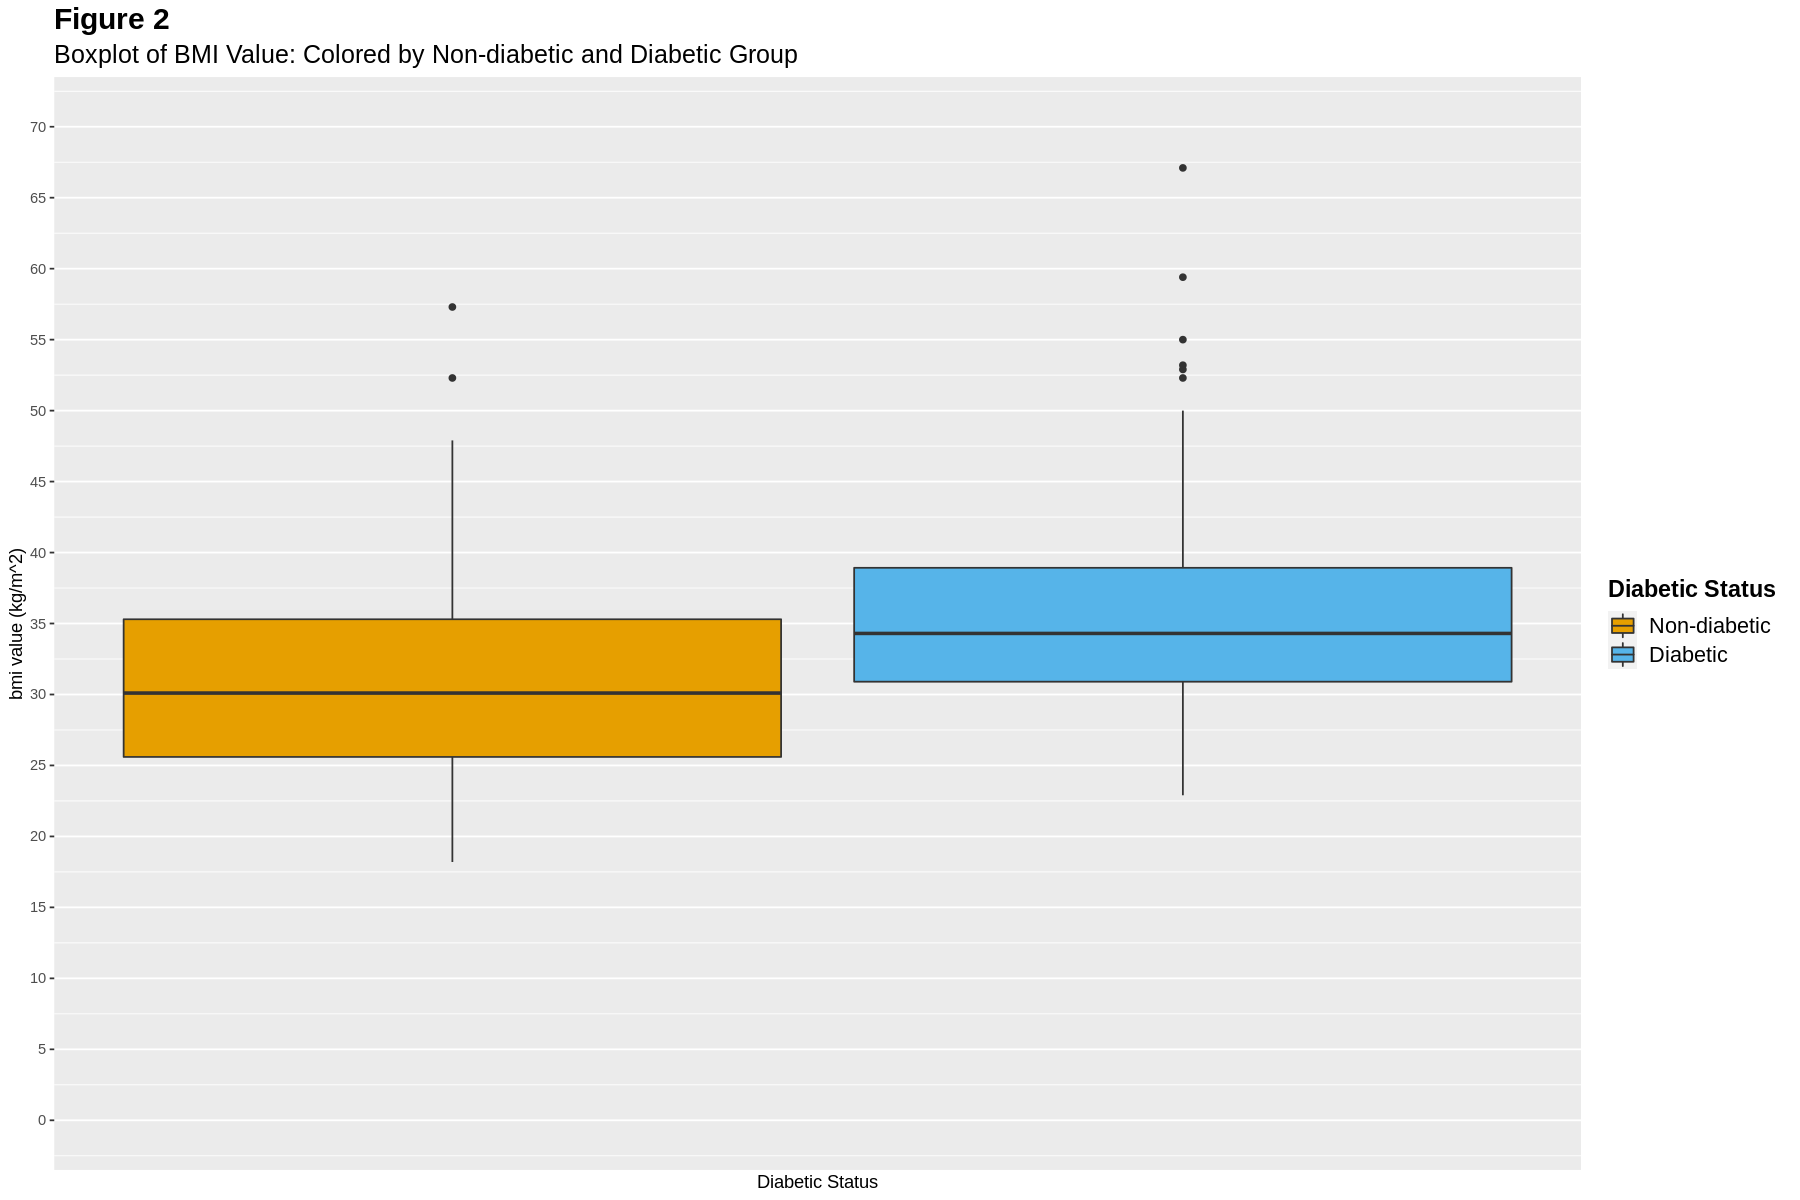

In [71]:
# BOXPLOT [Diabetic vs Non-Diabetic]

    boxplot <- 
    diabetes %>%
    ggplot(aes(y = bmi, fill = outcome)) +
    geom_boxplot() +
    labs(y = "bmi value (kg/m^2)", x = 'Diabetic Status', title = 'Figure 2',  subtitle = "Boxplot of BMI Value: Colored by Non-diabetic and Diabetic Group") +
    scale_fill_manual(values = c(lightorange, lightblue), labels = c("Non-diabetic", "Diabetic"), name = 'Diabetic Status') +
    scale_y_continuous(limits = c(0,70), breaks=seq(0,100, 5)) +
    scale_x_continuous(breaks=seq(-100,100, 200)) +
    theme(plot.title = element_text(face="bold", size=18), plot.subtitle = element_text(size=15), legend.title = element_text(face = "bold", size = 14), legend.text=element_text(size=13)) 

boxplot

 <font size="3"> **[2] Bootstrap Method : Hypothesis test + Confidence Interval** </font>

In [69]:
# BOOTSTRAPPING METHOD
set.seed(999)

    # bootstrap sampling distribution 
    boot_sample_dist <-
        diabetes %>%
        specify(formula = bmi ~ outcome) %>%
        generate(reps = 1000, type = "bootstrap") %>%
        calculate(stat = "diff in means", order = c("TRUE", "FALSE")) 

    # null sampling distribution
    boot_null_dist <-
        diabetes %>%
        specify(formula = bmi ~ outcome) %>%
        hypothesize(null="independence") %>%
        generate(reps = 1000, type = "permute") %>%
        calculate(stat = "diff in means", order = c("TRUE", "FALSE")) 

    # observed test statistic
    obs_test_stat <- difference_in_mean_sample

    # p value
    null_p_value <- 
        boot_null_dist %>% 
        get_p_value(obs_stat = obs_test_stat, direction = "right")

    # confidence interval : bootstrap sampling distribution
    boot_sample_ci <-
        boot_sample_dist %>%
        summarize(ci_lower = quantile(stat, 0.025),
                  ci_upper = quantile(stat, 0.975))

    # Visualization : bootstrap sampling distribution + null sampling distribution
    boot_null_dist_plot <- 
        ggplot() +
        labs(x = 'Difference in BMI mean (kg/m^2) \n [diabetic minus non-diabetic]', y = 'Count', title = 'Figure 3', subtitle = 'Simulated Bootstrap Null Distribution and Bootstrap Sampling Distribution (1000 reps) for Difference in BMI Mean Value (kg/m^2), \n With 95% C.I. and Labelled Observed Test Statistic') +
        scale_fill_discrete(name = "Histogram", labels = c('Null Distribution','Bootstrap Distribution')) +
        theme(plot.title = element_text(face="bold", size=18), plot.subtitle = element_text(size=15), legend.title = element_text(face = "bold", size = 14), legend.text=element_text(size=13)) +
        geom_histogram(aes(x = boot_sample_dist$stat, fill = 'boot_sample_dist$stat'), color = 'white', binwidth = 0.3 ) +
        geom_histogram(aes(x = boot_null_dist$stat, fill = 'boot_null_dist$stat'), color = 'white', binwidth = 0.3) +
        shade_confidence_interval(boot_sample_ci, alpha = 0.2, color = lightgreen, fill = lightgreen) +
        geom_vline(aes(xintercept = obs_test_stat, color = 'red'), size = 1.5)  + 
        scale_color_manual(values = c('red' = 'red'), labels = c("Observed Test Statistic"), name = 'Vertical Line') +
        scale_x_continuous(breaks=seq(-3,8, 0.5)) +
        scale_y_continuous(breaks=seq(0,250, 10)) 

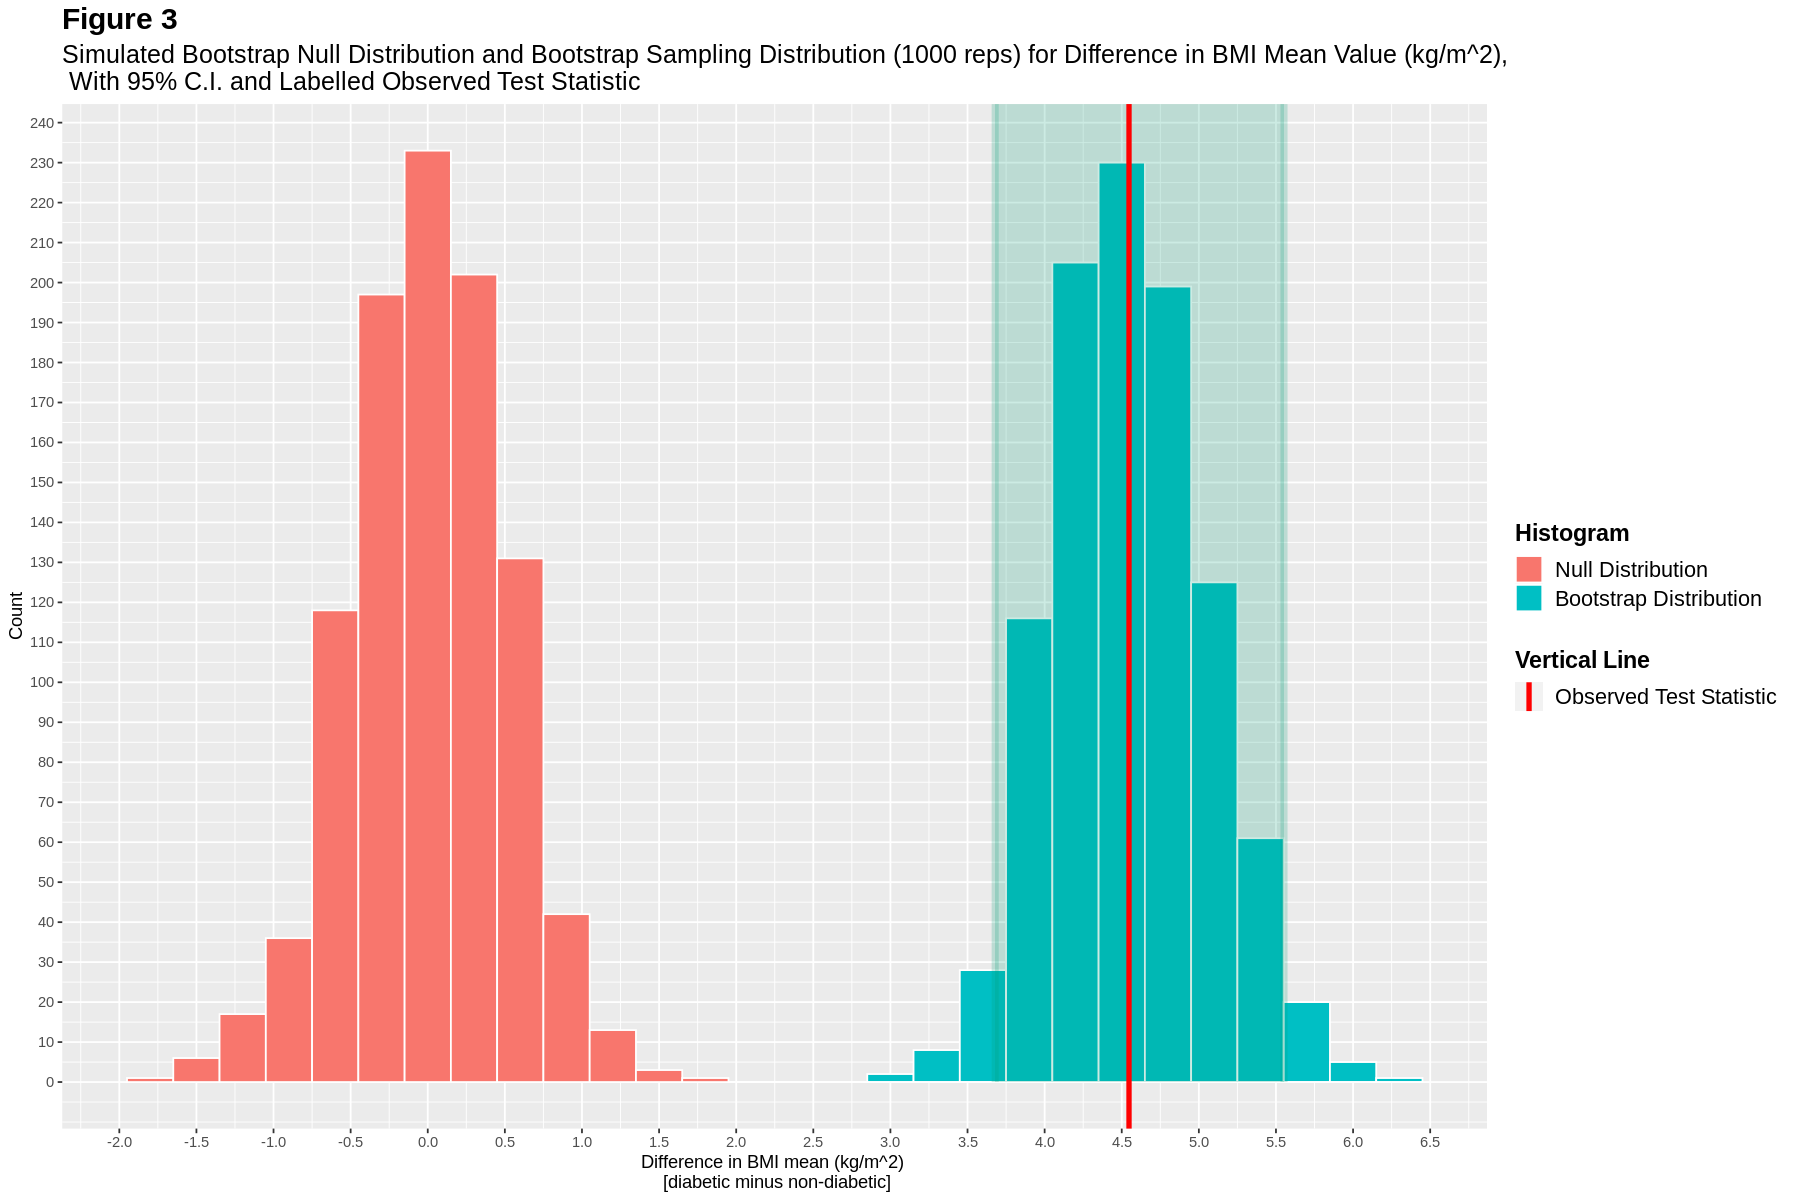

In [70]:
boot_null_dist_plot

In [135]:
cat(bold('Table 3 \n'))
cat(('Values of the Observed Test Statistic, P-Value, and Lower and Upper Bound of the 95% Confidence Interval, Found via the Bootstrapping Method\n '))
cbind(obs_test_stat, null_p_value, boot_sample_ci)

Table 3 
Values of the Observed Test Statistic, P-Value, and Lower and Upper Bound of the 95% Confidence Interval, Found via the Bootstrapping Method
 

obs_test_stat,p_value,ci_lower,ci_upper
<dbl>,<dbl>,<dbl>,<dbl>
4.547093,0,3.67953,5.552044


**(3) Asymptotic Method : Hypothesis test + Confidence Interval**

In [136]:
# ASYMPTOTIC METHOD
set.seed(999)

    # 2 sample t-test
    asymptotic_method <-
    broom::tidy(
    t.test(x = diabetic_group,
           y = nondiabetic_group,
           alternative = "greater",
           conf.level = 0.95)) %>%
    rename(obs.test.stat. = estimate,
           mean.diabetic = estimate1,
           mean.nondiabetic = estimate2,
          degree.of.freedom = parameter)

    # confidence interval : for both-sided
    
    degree_of_freedom <- asymptotic_method %>% pull(degree.of.freedom)
    
    asymptotic_ci <- tibble(
            lower_ci = (mean(diabetic_group$bmi) - mean(nondiabetic_group$bmi)) - qt(0.975, df = degree_of_freedom) * sqrt(var(diabetic_group$bmi)/nrow(diabetic_group) + var(nondiabetic_group$bmi)/nrow(nondiabetic_group)),
            upper_ci = (mean(diabetic_group$bmi) - mean(nondiabetic_group$bmi)) + qt(0.975, df = degree_of_freedom) * sqrt(var(diabetic_group$bmi)/nrow(diabetic_group) + var(nondiabetic_group$bmi)/nrow(nondiabetic_group)))

In [142]:
cat(bold('Table 4 \n'))
cat(('Values of the Observed Test Statistic, Mean BMI value Diabetic and Non-Diabetic Group, T-statistic, P-Value, Degree of Freedom, 
Lower and Upper Bounds of the 95% Confidence Interval Found via a One Sided Welch Two Sample t-test \n '))
asymptotic_method

Table 4 
Values of the Observed Test Statistic, Mean BMI value Diabetic and Non-Diabetic Group, T-statistic, P-Value, Degree of Freedom, 
Lower and Upper Bounds of the 95% Confidence Interval Found via a One Sided Welch Two Sample t-test 
 

obs.test.stat.,mean.diabetic,mean.nondiabetic,statistic,p.value,degree.of.freedom,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
4.547093,35.40677,30.85967,9.055004,1.241786e-18,539.7913,3.719687,Inf,Welch Two Sample t-test,greater


In [143]:
cat(bold('Table 5 \n'))
cat(('Lower and Upper Bounds of the 95% Confidence Interval of a Two-Sided Welch Two Sample T-Test \n '))
asymptotic_ci

Table 5 
Lower and Upper Bounds of the 95% Confidence Interval of a Two-Sided Welch Two Sample T-Test 
 

lower_ci,upper_ci
<dbl>,<dbl>
3.560659,5.533527


## Discussion 

Given the result and test statistics observed of both bootstrap simulation and asymptotics method, there is sufficient evidence to suggest that being diabetic is associated with higher BMI. In other words, people with diabetes are more likely to have a higher BMI than non-diabetic people. This is consistent with our beliefs that people with diabetes have higher average (mean) BMI, and we can also see that our findings are further supported by various studies during the background research. For example, in the study conducted by Gary et al. (2015), they examined the relationship between BMI and risk of being diagnosed with type 2 diabetes among older adults in the United States. The result showed that there is a positive relationship between BMI and being diagnosed as having diabetes, and any increase in BMI level is associated with an increased risk of having diabetic problems. However, one thing to keep in mind is that not all overweight or obese patients had the disease, and not all with these conditions were overweight or obese, as we are unable to conclude a causual relationship between these two variables. By rejecting the null hypothesis, we are also subject to commit type I error in this hypothesis test, which is, saying that the BMI for diabetic people and non-diabetic people is different when there indeed is the same. This is the risk that we need to take when making this decision. 

We believe that understanding the link between body weight and metabolic illnesses is essential to comprehending the pathophysiological mechanisms that underlie these diseases. This further emphasises the importance of a healthy diet and lifestyle. Given the considerable health and financial costs associated with diabetes, our findings also have important policy-forming formulations, which help improve early evaluation and management of risk factors leading to Diabetes. 

Future studies may investigate the effect of abdominal obesity on diabetes, as well as the relationship between food environment and diabetes. One could compare the average amount of fast-food consumption of people with diabetes to those who do not have diabetes. A longitudinal experiment on diabetic patients could also provide a better understanding of how the effects of rising BMI on the likelihood of diabetes change overtime.


## References

Feldman, A. L., Griffin, S. J., Ahern, A. L., Long, G. H., Weinehall, L., Fhärm, E., ... & Wennberg, P. (2017). Impact of weight maintenance and loss on diabetes risk and burden: a population-based study in 33,184 participants. BMC Public Health, 17(1), 1-10. doi:  10.1186/s12889-017-4081-6.

Huang, J. (2015). Commentary on “Relation between BMI and Diabetes Mellitus and Its
Complications among US Older Adults”. Southern Medical Journal, 108 (1), 37-38. doi: 10.14423/SMJ.0000000000000215.

Namdev, P. (2018, March 25). Diabetes_dataset. Kaggle. Retrieved July 21, 2022, from https://www.kaggle.com/datasets/pushprajnamdev/diabetes-dataset?resource=download&select=diabetes.csv

NHS. (n.d.). NHS choices. Retrieved July 25, 2022, from https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/ 
